In [11]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '66cc5397ba8342149627675683fd8940',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)




In [7]:
type(data)

dict

In [12]:
print(data)


{'status': {'timestamp': '2025-12-25T15:21:46.146Z', 'error_code': 0, 'error_message': None, 'elapsed': 37, 'credit_count': 1, 'notice': None, 'total_count': 8940}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12504, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [13]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [20]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12504,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.996698e+07,1.996698e+07,False,1.751994e+12,NaN,1,NaN,NaN,None,2025-12-25T15:20:00.000Z,87744.599643,1.911524e+10,-38.6213,0.192552,0.956995,-0.486664,1.545691,-22.701236,-19.657399,1.751994e+12,59.2349,1.842637e+12,None,2025-12-25T15:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-25 16:46:55.613863
1,1027,Ethereum,ETH,ethereum,11305,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206950e+08,1.206950e+08,True,3.542105e+11,NaN,2,NaN,NaN,None,2025-12-25T15:20:00.000Z,2934.757484,1.052994e+10,-40.8822,0.218129,0.659215,-0.384929,2.209181,-27.869553,-25.857359,3.542105e+11,11.9758,3.542105e+11,None,2025-12-25T15:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-25 16:46:55.613863
2,825,Tether USDt,USDT,tether,164169,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.868901e+11,1.888515e+11,True,1.887303e+11,NaN,3,NaN,NaN,None,2025-12-25T15:20:00.000Z,0.999358,5.106232e+10,-29.0061,-0.001890,-0.030530,-0.058951,-0.012379,-0.064049,-0.114466,1.867701e+11,6.3147,1.887303e+11,None,2025-12-25T15:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-12-25 16:46:55.613863
3,1839,BNB,BNB,bnb,3024,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.377348e+08,1.377348e+08,1.377348e+08,False,1.154123e+11,NaN,4,NaN,NaN,None,2025-12-25T15:20:00.000Z,837.930887,1.396908e+09,-11.6011,0.179738,-0.082497,-0.503582,-0.494465,-25.933272,-11.168264,1.154123e+11,3.9021,1.154123e+11,None,2025-12-25T15:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-25 16:46:55.613863
4,52,XRP,XRP,xrp,1774,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.057294e+10,9.998574e+10,False,1.867452e+11,NaN,5,NaN,NaN,None,2025-12-25T15:20:00.000Z,1.867718,1.439582e+09,-27.1789,0.078724,0.455225,-1.784806,-13.807253,-29.340187,-31.608744,1.131332e+11,3.8250,1.867718e+11,None,2025-12-25T15:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-25 16:46:55.613863
5,3408,USDC,USDC,usd-coin,35833,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.652810e+10,7.652810e+10,False,7.651107e+10,NaN,6,6.090122e+10,6.088767e+10,None,2025-12-25T15:20:00.000Z,0.999778,5.871804e+09,-40.4201,0.000905,-0.024481,-0.065028,0.020094,0.002107,-0.002799,7.651107e+10,2.5868,7.651107e+10,None,2025-12-25T15:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-12-25 16:46:55.613863
6,5426,Solana,SOL,solana,1066,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.625379e+08,6.168613e+08,True,7.525617e+10,NaN,7,5.252369e+08,6.407813e+10,None,2025-12-25T15:20:00.000Z,121.998525,1.701499e+09,-37.2023,-0.052975,0.223095,-3.714995,-8.937453,-38.720580,-37.800683,6.862879e+10,2.3203,7.525617e+10,None,2025-12-25T15:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-25 16:46:55.613863
7,1958,TRON,TRX,tron,1272,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.468906e+10,9.468907e+10,True,2.638036e+10,NaN,8,9.466789e+10,2.637446e+10,None,2025-12-25T15:20:00.000Z,0.278600,4.677582e+08,-5.9755,-0.143349,-1.118027,-0.946695,2.529442,-7.154793,-16.644856,2.638036e+10,0.8919,2.638036e+10,No

In [25]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '66cc5397ba8342149627675683fd8940',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)



    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\mrh\OneDrive\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\mrh\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\mrh\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)

    #Then to read in the file: df = pd.read_csv(r'C:\Users\mrh\OneDrive\Documents\Python Scripts\API.csv')

# If that didn't work try using the local host URL as shown in the video

In [26]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)
exit()

API Runner completed
API Runner completed


KeyboardInterrupt: 

In [27]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,12504,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.996698e+07,1.996698e+07,False,1.751994e+12,NaN,1,NaN,NaN,None,2025-12-25T15:20:00.000Z,87744.599643,1.911524e+10,-38.6213,0.192552,0.956995,-0.486664,1.545691,-22.701236,-19.657399,1.751994e+12,59.2349,1.842637e+12,None,2025-12-25T15:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-25 16:46:55.613863,NaT
1,1027,Ethereum,ETH,ethereum,11305,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206950e+08,1.206950e+08,True,3.542105e+11,NaN,2,NaN,NaN,None,2025-12-25T15:20:00.000Z,2934.757484,1.052994e+10,-40.8822,0.218129,0.659215,-0.384929,2.209181,-27.869553,-25.857359,3.542105e+11,11.9758,3.542105e+11,None,2025-12-25T15:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-25 16:46:55.613863,NaT
2,825,Tether USDt,USDT,tether,164169,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.868901e+11,1.888515e+11,True,1.887303e+11,NaN,3,NaN,NaN,None,2025-12-25T15:20:00.000Z,0.999358,5.106232e+10,-29.0061,-0.001890,-0.030530,-0.058951,-0.012379,-0.064049,-0.114466,1.867701e+11,6.3147,1.887303e+11,None,2025-12-25T15:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-12-25 16:46:55.613863,NaT
3,1839,BNB,BNB,bnb,3024,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.377348e+08,1.377348e+08,1.377348e+08,False,1.154123e+11,NaN,4,NaN,NaN,None,2025-12-25T15:20:00.000Z,837.930887,1.396908e+09,-11.6011,0.179738,-0.082497,-0.503582,-0.494465,-25.933272,-11.168264,1.154123e+11,3.9021,1.154123e+11,None,2025-12-25T15:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-25 16:46:55.613863,NaT
4,52,XRP,XRP,xrp,1774,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.057294e+10,9.998574e+10,False,1.867452e+11,NaN,5,NaN,NaN,None,2025-12-25T15:20:00.000Z,1.867718,1.439582e+09,-27.1789,0.078724,0.455225,-1.784806,-13.807253,-29.340187,-31.608744,1.131332e+11,3.8250,1.867718e+11,None,2025-12-25T15:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-25 16:46:55.613863,NaT
5,3408,USDC,USDC,usd-coin,35833,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.652810e+10,7.652810e+10,False,7.651107e+10,NaN,6,6.090122e+10,6.088767e+10,None,2025-12-25T15:20:00.000Z,0.999778,5.871804e+09,-40.4201,0.000905,-0.024481,-0.065028,0.020094,0.002107,-0.002799,7.651107e+10,2.5868,7.651107e+10,None,2025-12-25T15:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-12-25 16:46:55.613863,NaT
6,5426,Solana,SOL,solana,1066,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.625379e+08,6.168613e+08,True,7.525617e+10,NaN,7,5.252369e+08,6.407813e+10,None,2025-12-25T15:20:00.000Z,121.998525,1.701499e+09,-37.2023,-0.052975,0.223095,-3.714995,-8.937453,-38.720580,-37.800683,6.862879e+10,2.3203,7.525617e+10,None,2025-12-25T15:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-25 16:46:55.613863,NaT
7,1958,TRON,TRX,tron,1272,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.468906e+10,9.468907e+10,True,2.638036e+10,NaN,8,9.466789e+10,2.637446e+10,None,2025-12-25T15:20:00.000Z,0.278600,4.677582e+08,-5.9755,-0.143349,-1.118027,-0.946695,2.529442,-7.154793,-16.6448

In [28]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.244083,0.856416,-0.196219,1.256217,-22.621306,-19.600071
Ethereum,-0.337766,0.403737,-0.079228,1.230670,-27.569068,-26.050928
Tether USDt,0.004947,-0.007728,-0.018032,-0.018998,-0.058994,-0.105334
BNB,-0.151006,-0.332338,-0.604783,-1.152417,-25.670180,-11.574223
XRP,-0.245758,0.486904,-1.908317,-14.437450,-28.917297,-31.975601
USDC,0.005081,-0.006323,-0.016444,0.009175,0.011441,0.002905
Solana,0.059313,0.661068,-2.840680,-8.972580,-38.126397,-37.930156
TRON,-0.258388,-1.291162,-1.203176,2.029213,-7.194896,-17.076414
Dogecoin,-0.241374,-1.086199,-1.316717,-14.727344,-37.392159,-44.437934


In [29]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.244083
              quote.USD.percent_change_24h     0.856416
              quote.USD.percent_change_7d     -0.196219
              quote.USD.percent_change_30d     1.256217
              quote.USD.percent_change_60d   -22.621306
              quote.USD.percent_change_90d   -19.600071
Ethereum      quote.USD.percent_change_1h     -0.337766
              quote.USD.percent_change_24h     0.403737
              quote.USD.percent_change_7d     -0.079228
              quote.USD.percent_change_30d     1.230670
              quote.USD.percent_change_60d   -27.569068
              quote.USD.percent_change_90d   -26.050928
Tether USDt   quote.USD.percent_change_1h      0.004947
              quote.USD.percent_change_24h    -0.007728
              quote.USD.percent_change_7d     -0.018032
              quote.USD.percent_change_30d    -0.018998
              quote.USD.percent_change_60d    -0.058994
              quote.USD.percent_change_90d    -0.105334
BNB           quote.USD.percent_change_1h     -0.151006
              quote.USD.percent_change_24h    -0.332338
              quote.USD.percent_change_7d     -0.604783
              quote.USD.percent_change_30d    -1.152417
              quote.USD.percent_change_60d   -25.670180
              quote.USD.percent_change_90d   -11.574223
XRP           quote.USD.percent_change_1h     -0.245758
              quote.USD.percent_change_24h     0.486904
              quote.USD.percent_change_7d     -1.908317
              quote.USD.percent_change_30d   -14.437450
              quote.USD.percent_change_60d   -28.917297
              quote.USD.percent_change_90d   -31.975601
USDC          quote.USD.percent_change_1h      0.005081
              quote.USD.percent_change_24h    -0.006323
              quote.USD.percent_change_7d     -0.016444
              quote.USD.percent_change_30d     0.009175
              quote.USD.percent_change_60d     0.011441
              quote.USD.percent_change_90d     0.002905
Solana        quote.USD.percent_change_1h      0.059313
              quote.USD.percent_change_24h     0.661068
              quote.USD.percent_change_7d     -2.840680
              quote.USD.percent_change_30d    -8.972580
              quote.USD.percent_change_60d   -38.126397
              quote.USD.percent_change_90d   -37.930156
TRON          quote.USD.percent_change_1h     -0.258388
              quote.USD.percent_change_24h    -1.291162
              quote.USD.percent_change_7d     -1.203176
              quote.USD.percent_change_30d     2.029213
              quote.USD.percent_change_60d    -7.194896
              quote.USD.percent_change_90d   -17.076414
Dogecoin      quote.USD.percent_change_1h     -0.241374
              quote.USD.percent_change_24h    -1.086199
              quote.USD.percent_change_7d     -1.316717
              quote.USD.percent_change_30d   -14.727344
              quote.USD.percent_change_60d   -37.392159
              quote.USD.percent_change_90d   -44.437934
Cardano       quote.USD.percent_change_1h     -0.429305
              quote.USD.percent_change_24h    -0.479409
              quote.USD.percent_change_7d     -4.515111
              quote.USD.percent_change_30d   -14.219508
              quote.USD.percent_change_60d   -47.566621
              quote.USD.percent_change_90d   -54.561352
Bitcoin Cash  quote.USD.percent_change_1h     -0.065376
              quote.USD.percent_change_24h     4.307346
              quote.USD.percent_change_7d      3.636433
              quote.USD.percent_change_30d    13.806067
              quote.USD.percent_change_60d     7.476749
              quote.USD.percent_change_90d     8.962426
Chainlink     quote.USD.percent_change_1h     -0.273188
              quote.USD.percent_change_24h     1.120686
              quote.USD.percent_change_7d     -2.036975
              quote.USD.percent_change_30d    -4.062882
              quote.USD.percent_chang

In [30]:
df5 = df4.to_frame(name='values')
df5

values
name                                                
Bitcoin      quote.USD.percent_change_1h   -0.244083
             quote.USD.percent_change_24h   0.856416
             quote.USD.percent_change_7d   -0.196219
             quote.USD.percent_change_30d   1.256217
             quote.USD.percent_change_60d -22.621306
             quote.USD.percent_change_90d -19.600071
Ethereum     quote.USD.percent_change_1h   -0.337766
             quote.USD.percent_change_24h   0.403737
             quote.USD.percent_change_7d   -0.079228
             quote.USD.percent_change_30d   1.230670
             quote.USD.percent_change_60d -27.569068
             quote.USD.percent_change_90d -26.050928
Tether USDt  quote.USD.percent_change_1h    0.004947
             quote.USD.percent_change_24h  -0.007728
             quote.USD.percent_change_7d   -0.018032
             quote.USD.percent_change_30d  -0.018998
             quote.USD.percent_change_60d  -0.058994
             quote.USD.percent_change_90d  -0.105334
BNB          quote.USD.percent_change_1h   -0.151006
             quote.USD.percent_change_24h  -0.332338
             quote.USD.percent_change_7d   -0.604783
             quote.USD.percent_change_30d  -1.152417
             quote.USD.percent_change_60d -25.670180
             quote.USD.percent_change_90d -11.574223
XRP          quote.USD.percent_change_1h   -0.245758
             quote.USD.percent_change_24h   0.486904
             quote.USD.percent_change_7d   -1.908317
             quote.USD.percent_change_30d -14.437450
             quote.USD.percent_change_60d -28.917297
             quote.USD.percent_change_90d -31.975601
USDC         quote.USD.percent_change_1h    0.005081
             quote.USD.percent_change_24h  -0.006323
             quote.USD.percent_change_7d   -0.016444
             quote.USD.percent_change_30d   0.009175
             quote.USD.percent_change_60d   0.011441
             quote.USD.percent_change_90d   0.002905
Solana       quote.USD.percent_change_1h    0.059313
             quote.USD.percent_change_24h   0.661068
             quote.USD.percent_change_7d   -2.840680
             quote.USD.percent_change_30d  -8.972580
             quote.USD.percent_change_60d -38.126397
             quote.USD.percent_change_90d -37.930156
TRON         quote.USD.percent_change_1h   -0.258388
             quote.USD.percent_change_24h  -1.291162
             quote.USD.percent_change_7d   -1.203176
             quote.USD.percent_change_30d   2.029213
             quote.USD.percent_change_60d  -7.194896
             quote.USD.percent_change_90d -17.076414
Dogecoin     quote.USD.percent_change_1h   -0.241374
             quote.USD.percent_change_24h  -1.086199
             quote.USD.percent_change_7d   -1.316717
             quote.USD.percent_change_30d -14.727344
             quote.USD.percent_change_60d -37.392159
             quote.USD.percent_change_90d -44.437934
Cardano      quote.USD.percent_change_1h   -0.429305
             quote.USD.percent_change_24h  -0.479409
             quote.USD.percent_change_7d   -4.515111
             quote.USD.percent_change_30d -14.219508
             quote.USD.percent_change_60d -47.566621
             quote.USD.percent_change_90d -54.561352
Bitcoin Cash quote.USD.percent_change_1h   -0.065376
             quote.USD.percent_change_24h   4.307346
             quote.USD.percent_change_7d    3.636433
             quote.USD.percent_change_30d  13.806067
             quote.USD.percent_change_60d   7.476749
             quote.USD.percent_change_90d   8.962426
Chainlink    quote.USD.percent_change_1h   -0.273188
             quote.USD.percent_change_24h   1.120686
             quote.USD.percent_change_7d   -2.036975
             quote.USD.percent_change_30d  -4.062882
             quote.USD.percent_change_60d -32.548780
             quote.USD.percent_change_90d -40.624052
Hyperliquid  quote.USD.percent_change_1h    0.141175
             quote.USD.percent_change_24h   2.336013
             quote

In [40]:

index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.244083
1,Bitcoin,quote.USD.percent_change_24h,0.856416
2,Bitcoin,quote.USD.percent_change_7d,-0.196219
3,Bitcoin,quote.USD.percent_change_30d,1.256217
4,Bitcoin,quote.USD.percent_change_60d,-22.621306
5,Bitcoin,quote.USD.percent_change_90d,-19.600071
6,Ethereum,quote.USD.percent_change_1h,-0.337766
7,Ethereum,quote.USD.percent_change_24h,0.403737
8,Ethereum,quote.USD.percent_change_7d,-0.079228
9,Ethereum,quote.USD.percent_change_30d,1.230670


In [51]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.244083
1,Bitcoin,quote.USD.percent_change_24h,0.856416
2,Bitcoin,quote.USD.percent_change_7d,-0.196219
3,Bitcoin,quote.USD.percent_change_30d,1.256217
4,Bitcoin,quote.USD.percent_change_60d,-22.621306
5,Bitcoin,quote.USD.percent_change_90d,-19.600071
6,Ethereum,quote.USD.percent_change_1h,-0.337766
7,Ethereum,quote.USD.percent_change_24h,0.403737
8,Ethereum,quote.USD.percent_change_7d,-0.079228
9,Ethereum,quote.USD.percent_change_30d,1.230670


In [52]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.244083
1,Bitcoin,24h,0.856416
2,Bitcoin,7d,-0.196219
3,Bitcoin,30d,1.256217
4,Bitcoin,60d,-22.621306
5,Bitcoin,90d,-19.600071
6,Ethereum,1h,-0.337766
7,Ethereum,24h,0.403737
8,Ethereum,7d,-0.079228
9,Ethereum,30d,1.230670


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

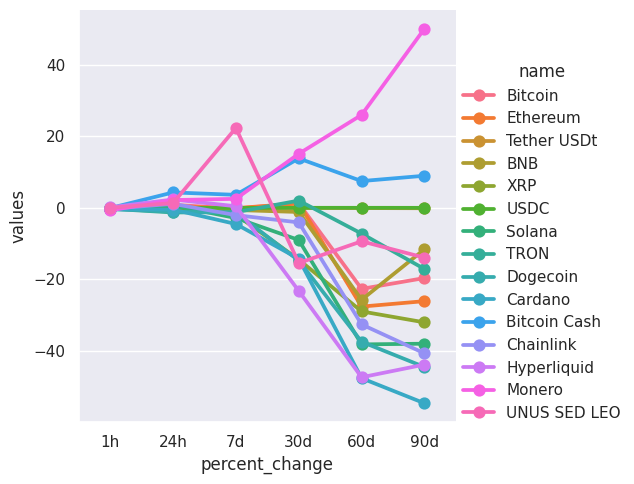

In [53]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')